In [ ]:
import json
from keras.models import Model, Sequential

In [6]:
import json
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop
import preprocess
import model  # import your model
import matplotlib.pyplot as plt
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras import layers, models
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
from keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [7]:
def get_model(name, input_shape, num_classes, dropout):
    if name == "model":
        return model.build_model(input_shape=input_shape, num_classes=num_classes, dropout=dropout)
    else:
        raise ValueError("Unknown model name.")

# def train(model, config, train_ds, val_ds, name):
#     model.compile(
#         optimizer=Adam(learning_rate=config["learning_rate"]),
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )
#     history = model.fit(
#         train_ds,
#         validation_data=val_ds,
#         epochs=config["epochs"]
#     )
#     model.save(f"models/{name}_model.h5")
#     print(f"{name} model saved at models/{name}_model.h5!")
#     return history



def train(model, config, train_ds, val_ds, name):
    model.compile(
        optimizer=Adam(learning_rate=config["learning_rate"]),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    # EarlyStopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1,
         min_delta=0.0001
    )

    # ReduceLROnPlateau callback
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        verbose=1,
        min_delta=0.0001
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=config["epochs"],
        callbacks=[early_stop,reduce_lr]
    )

    model.save(f"models/{name}_model.h5")
    print(f"{name} model saved at models/{name}_model.h5!")
    return history


In [9]:

model_name = "model"  
folder_path = "../../../Data/images/"

# Load config from file (change path accordingly)
config_path = "../config/config1.json"
with open(config_path) as f:
    config = json.load(f)

input_shape = (48, 48, 1)
num_classes = 7

# Load datasets
#train_ds,val_ds = preprocess.get_data_splits(img_size=(48, 48), batch_size=config["batch_size"])
#train_ds,val_ds = preprocess.stratified_data_split("../../../Data/images/train")




batch_size = 64
picture_size = 48

train_ds, val_ds= preprocess.get_train_val_data_gen(folder_path, picture_size, batch_size,val_split=0.1, seed=42)

# Apply augmentation on training data
# augment = preprocess.get_augmentation_model(input_shape=input_shape)
# train_ds = train_ds.map(lambda x, y: (augment(x, training=True), y))



Found 25942 images belonging to 7 classes.
Found 2879 images belonging to 7 classes.


In [10]:
model = get_model(model_name, input_shape, num_classes, config.get("dropout", 0.5))
#  Train the model and return training history
history = train(model, config, train_ds, val_ds, model_name)



Epoch 1/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 251s 614ms/step - accuracy: 0.1957 - loss: 2.1868 - val_accuracy: 0.2487 - val_loss: 1.8397 - learning_rate: 0.0010
Epoch 2/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 245s 604ms/step - accuracy: 0.2304 - loss: 1.8583 - val_accuracy: 0.2487 - val_loss: 1.9870 - learning_rate: 0.0010
Epoch 3/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 247s 609ms/step - accuracy: 0.2872 - loss: 1.7612 - val_accuracy: 0.2497 - val_loss: 2.3499 - learning_rate: 0.0010
Epoch 4/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 242s 596ms/step - accuracy: 0.3613 - loss: 1.6282 - val_accuracy: 0.2643 - val_loss: 1.9267 - learning_rate: 0.0010
Epoch 5/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 239s 589ms/step - accuracy: 0.3907 - loss: 1.5465 - val_accuracy: 0.3928 - val_loss: 1.5601 - learning_rate: 0.0010
Epoch 6/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 235s 578ms/step - accuracy: 0.4144 - loss: 1.5008 - val_accuracy: 0.3918 - val_loss: 1.5439 - learning_rate: 0.0010
Epoch 7/50
406/406 ━━━━━━━━━━━━━━━━━━━━ 233s 574ms/step - accura

model model saved at models/model_model.h5!


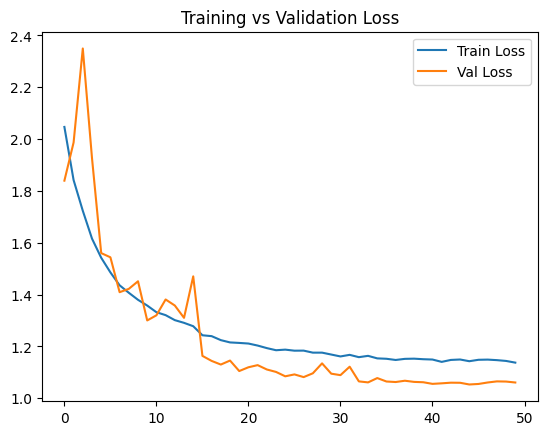

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

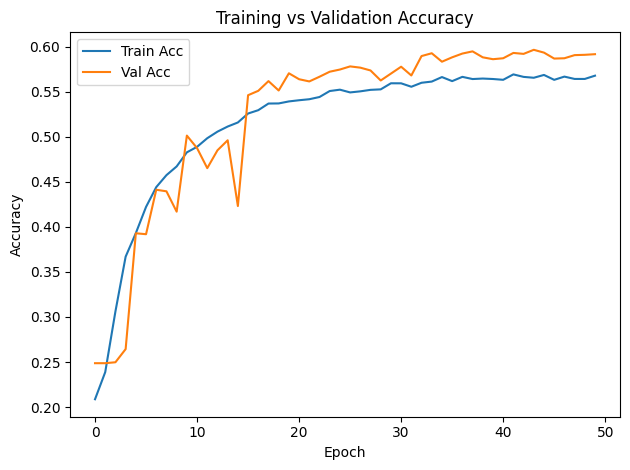

In [ ]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    classification_report
)

if "accuracy" in history.history and "val_accuracy" in history.history:
    plt.figure()
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.tight_layout()
    plt.show()

